# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Adrian
- **Email:** adriancool.ac18@gmail.com
- **ID Dicoding:** rianadrian29

## Menentukan Pertanyaan Bisnis

- What are the peak times of the day for bike rentals?
- How does the weather affect the number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Dataset Characteristics:**
* Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Check day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
print("Total duplicates: ", day_df.duplicated().sum())

Total duplicates:  0


**Insight:**
- dteday data type should be datetime
- No missing value
- No duplicates

#### Check hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Total duplicates: ", hour_df.duplicated().sum())

Total duplicates:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### **Assessment Result**
- both datasets have similar contents. only, hour_df has an additional 1 column, namely hr. which makes hour_df more complete than day_df. Therefore, we will use hour_df until the end of this project.
- we will change dteday data type into datetime.
- We will change some of the column values to make it easier to understand. such as, columns season, yr, holiday, weekday, workingday, and weathersit.
- there is no missing value and duplicate data.

### Cleaning Data

#### Change Data Type of dteday

In [14]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Change Value

##### Season (Change value 1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter')

In [15]:
season_mapping = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### yr (Change value 0:2011, 1:2012)

In [16]:
yr_mapping = {0:2011, 1:2012}
hour_df['yr'] = hour_df['yr'].map(yr_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### mnth (make sure mnth is the same as dteday)

In [17]:
hour_df['mnth'] = hour_df['dteday'].dt.month
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### holiday (Change value 0:'Not Holiday', 1:'Holiday')

In [18]:
holiday_mapping = {0:'Not Holiday', 1:'Holiday'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### weekday (Change value 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday')

In [19]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### workingday (Change value 0:'Not Workingday', 1:'Workingday')

In [20]:
workingday_mapping = {0:'Not Workingday', 1:'Workingday'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,0,1,1


##### weathersit (Change value 1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain')

In [21]:
weathersit_mapping = {1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Not Holiday,Saturday,Not Workingday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Not Holiday,Saturday,Not Workingday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Not Holiday,Saturday,Not Workingday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Not Holiday,Saturday,Not Workingday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Not Holiday,Saturday,Not Workingday,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Insight
- hour_df is clean now

## Exploratory Data Analysis (EDA)

### Explore total of rented bikes per hour and by its weather with Time-Series Analysis & Regression Analysis

#### Total number of bikes rented per hour (Time-Series Analysis)

In [22]:
hour_df.groupby(by='hr').cnt.sum().reset_index().sort_values(by='hr', ascending=True)

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


- Most rented at 5 PM

In [23]:
hour_df.groupby(by='weekday').cnt.sum().reset_index().sort_values(by='weekday', ascending=True)

,weekday,cnt
0,Friday,487790
1,Monday,455503
2,Saturday,477807
3,Sunday,444027
4,Thursday,485395
5,Tuesday,469109
6,Wednesday,473048


- Most rented on Thursday

In [24]:
hour_df.groupby(by='season').cnt.sum().reset_index().sort_values(by='season', ascending=True)

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


- Most rented when it is Fall Season

#### Total number of bikes rented by weather (Regression Analysis)

In [25]:
hour_df.groupby(by='weathersit').cnt.sum().reset_index().sort_values(by='cnt', ascending=False)

,weathersit,cnt
0,Clear,2338173
1,Cloudy,795952
3,Light Rain,158331
2,Heavy Rain,223


- Most rented when the weather is Clear

## Visualization & Explanatory Analysis

### What are the peak times of the day for bike rentals?


##### Bar Chart

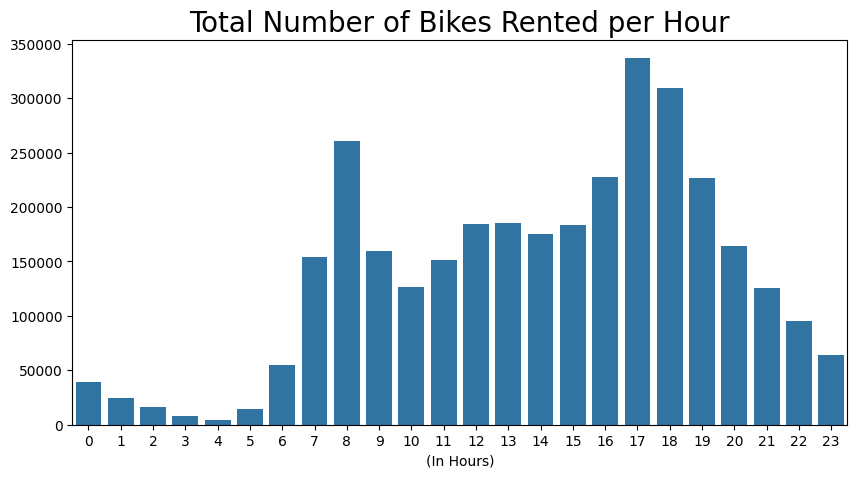

In [26]:
hourly_df = hour_df.groupby(by='hr').cnt.sum().reset_index().sort_values(by='cnt', ascending=False)

plt.figure(figsize=(10,5))

sns.barplot(
    y= 'cnt',
    x= 'hr',
    data= hourly_df,
)

plt.title("Total Number of Bikes Rented per Hour", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel("(In Hours)")
plt.tick_params(axis='x', labelsize=10)
plt.show()


##### Line Chart

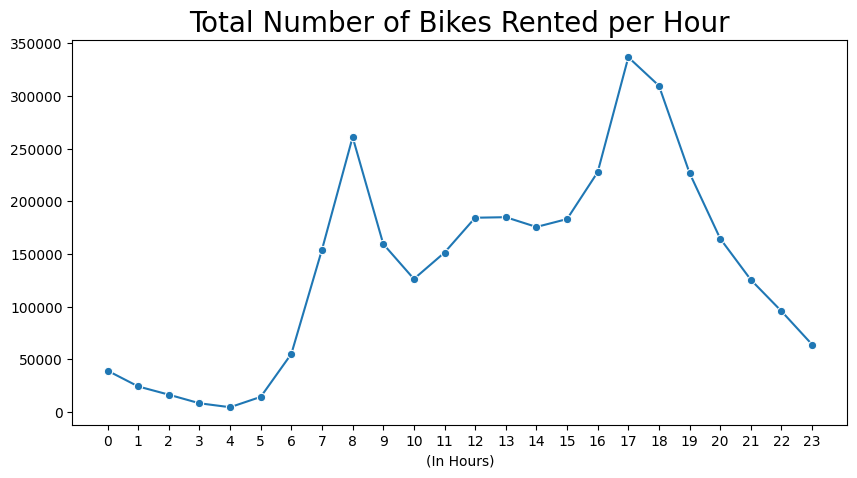

In [27]:
hourly_df = hour_df.groupby(by='hr').cnt.sum().reset_index()

plt.figure(figsize=(10,5))

sns.lineplot(x='hr', y='cnt', data=hourly_df, marker='o')

plt.title("Total Number of Bikes Rented per Hour", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel("(In Hours)")
plt.tick_params(axis='x', labelsize=10)
plt.xticks(hourly_df['hr'])
plt.show()


As you can see in the visualization above, we can see that the peak of bike rentals is at 5 pm. which is generally many people want to exercise in the morning and evening. seen in the visualization above, there was a significant change in the morning after that there was a decrease in the afternoon and jumped again in the afternoon

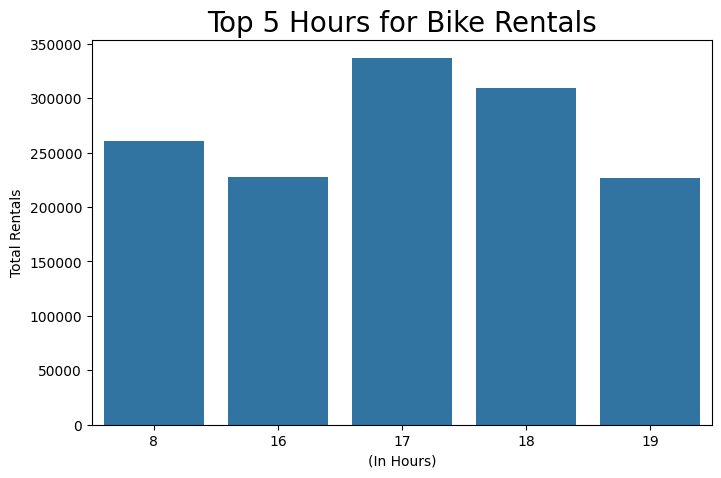

In [28]:
top_5_hourly_df = hour_df.groupby(by='hr')['cnt'].sum().reset_index().nlargest(5, 'cnt')


plt.figure(figsize=(8, 5))

sns.barplot(
    y= 'cnt',
    x= 'hr',
    data= top_5_hourly_df,
)

plt.title("Top 5 Hours for Bike Rentals", loc="center", fontsize=20)
plt.ylabel("Total Rentals")
plt.xlabel("(In Hours)")
plt.tick_params(axis='x', labelsize=10)
plt.show()


and this is the Top 5 Hours, you can see that there is 8am in the Top 5 Hours which proves that there are many people also renting bikes in the morning

### How does the weather affect the number of bike rentals?

##### Bar Chart

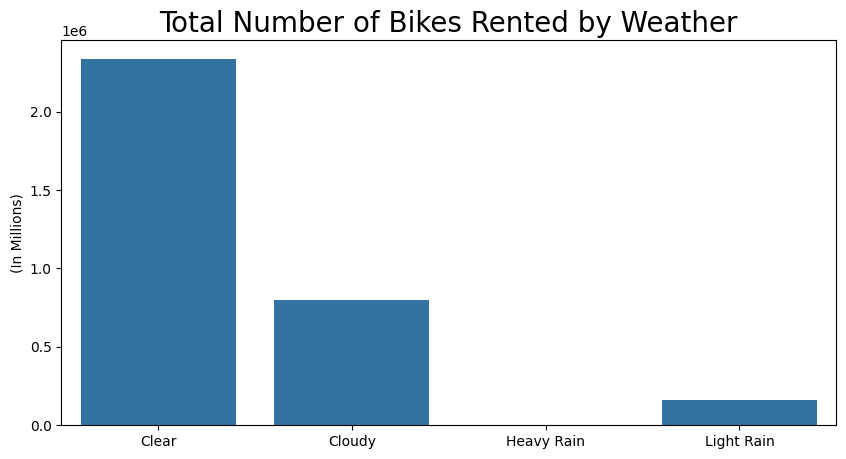

In [29]:
weather_df = hour_df.groupby(by='weathersit').cnt.sum().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(
    y= 'cnt',
    x= 'weathersit',
    data= weather_df,
)

plt.title("Total Number of Bikes Rented by Weather", loc="center", fontsize=20)
plt.ylabel("(In Millions)")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()


##### Pie Chart

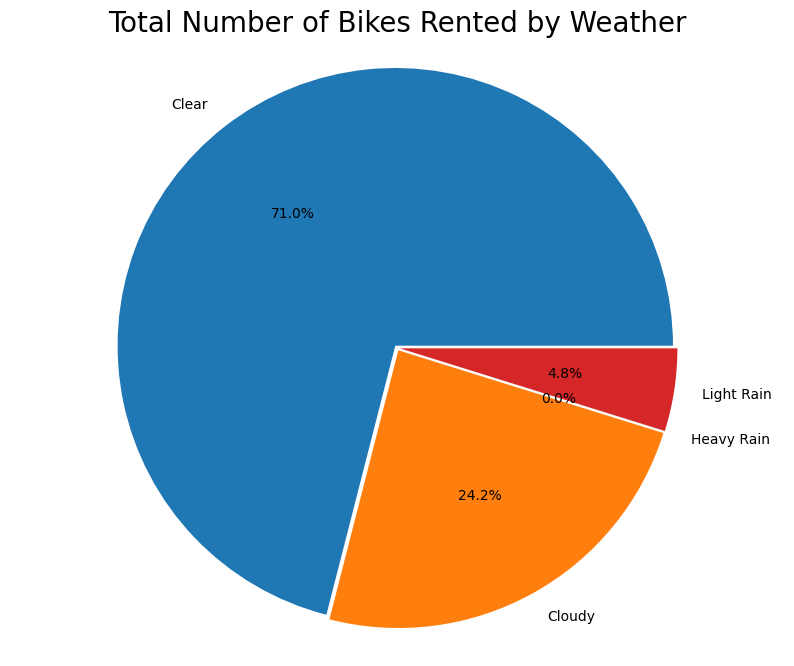

In [30]:
weather_df = hour_df.groupby(by='weathersit')['cnt'].sum().reset_index()

explode = (0.01,0.01,0.01,0.01)
plt.figure(figsize=(10, 8))
plt.pie(weather_df['cnt'],explode=explode , labels=weather_df['weathersit'], autopct='%1.1f%%',)
plt.title("Total Number of Bikes Rented by Weather", loc="center", fontsize=20)


plt.axis('equal')
plt.show()


Weather affects bike rentals, and it can be seen from the visualization above that there is a significant difference. The worse the weather, the fewer people rent bikes. It can be seen that when the weather is clear, there are the most renters, and heavy rain has the fewest or almost no renters.

## Conclusion

Based on the analysis and visualizations:

- Peak Rental Times:

The peak of bike rentals occurs at 5 PM, indicating that many people prefer to ride in the morning and evening for exercise. There is a noticeable increase in rentals in the morning, followed by a decrease during the afternoon, and a resurgence in the evening.

- Affect of Weather:

Weather significantly influences bike rentals. When the weather is clear, the number of rentals is highest, while heavy rain results in a drastic decrease in rentals, almost to zero. This suggests that poor weather conditions deter people from renting bikes.

In [31]:
hour_df.to_csv("main_data.csv", index=False)